In [1]:
import scipy.special
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
from sys import getsizeof
import pickle

In [252]:
n = 10000;
s = np.sqrt(0.4);
w = 0.5;

L = np.eye(n);
R = np.eye(n)*s/np.sqrt(n);
J = np.random.randn(n,n);
M = np.concatenate((np.concatenate( (np.zeros((n-1,1)), np.eye(n-1)), axis = 1 ), np.zeros((1,n))));
M[-1,0] = 1;

Jtot = np.matmul(L, np.matmul(J,R)) + M*w;


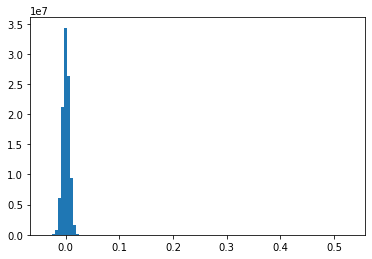

In [253]:
plt.hist(Jtot.flatten(), 100);

In [254]:
eig, ev = np.linalg.eig(Jtot)

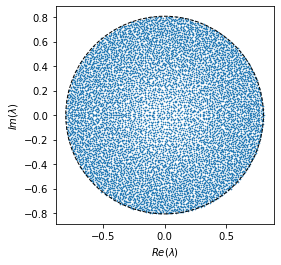

In [255]:
fig,ax = plt.subplots() 
ax.scatter(eig.real, eig.imag, s=0.3) 

p1 = matplotlib.patches.Circle((0,0), radius = np.sqrt(max(w**2 - s**2, 0)),
                                   fill=False, linestyle = '--')
p2 = matplotlib.patches.Circle((0,0), radius = np.sqrt(w**2 + s**2),
                                   fill=False, linestyle = '--')
ax.set_xlabel('$Re(\lambda)$')
ax.set_ylabel('$Im(\lambda)$')
        
ax.add_patch(p1)
ax.add_patch(p2)
ax.set_aspect(1)

In [210]:
np.sqrt(w**2 + s**2)

1.3038404810405297

In [193]:
def RadialBins(nbins, left, right):
    rborders = np.zeros(nbins+1) 

    rborders[0] = 0;
    rborders[1] = 1;
    for i in range(2,len(rborders)): rborders[i] = np.sqrt(2*rborders[i-1]**2 - rborders[i-2]**2)#np.sqrt(2*rborders[i-1]**2 - rborders[i-2]**2)


    bins = (rborders - rborders.min())*(right-left)/(rborders.max() - rborders.min()) + left;
    
    rs = (bins[1:None] + bins[0:-1])/2
    areas = np.multiply(rs, np.diff(bins))
    
    return bins, rs, areas;

In [202]:
bins, rs, areas = RadialBins(35, 0, 1.4)
h,rb =  np.histogram(np.abs(eig), bins = bins, density=False)
density = h/np.multiply(h, areas ).sum()*1/np.pi/2;

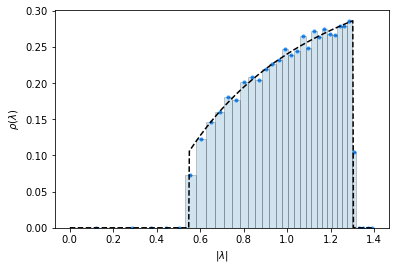

In [229]:
theoretical = lambda z, w, v: np.multiply(1/(np.pi*v)*(1 - w**2/np.sqrt(4*w**2*z**2+ v**2) ), 
                                          np.multiply((z**2 <= w**2 + v), (z**2 >= max(w**2 - v,0))) )


fig,ax = plt.subplots();

ax.scatter(rs, density, marker='.', color='dodgerblue')
ax.bar(rs, density, width = np.diff(rb), edgecolor = 'black', alpha = 0.2)

rs2 = np.linspace(bins.min(), bins.max(), 500);
ax.plot(rs2, theoretical(rs2, w, s**2), color='black', linestyle = '--')

ax.set_xlabel('$|\lambda|$');
ax.set_ylabel('$\\rho(\lambda)$');

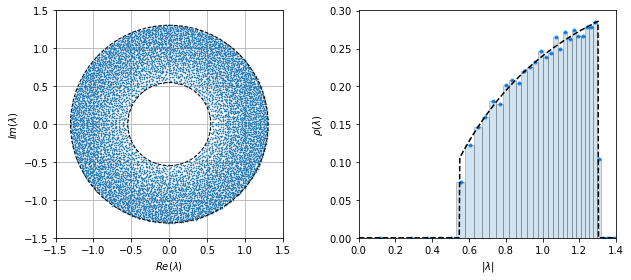

In [251]:
fig, axs = plt.subplots(1,2, figsize=(9,4))

axs[0].scatter(eig.real, eig.imag, s=0.3) 
axs[0].set_xlabel('$Re(\lambda)$'); axs[0].set_ylabel('$Im(\lambda)$');        
p1 = matplotlib.patches.Circle((0,0), radius = np.sqrt(max(w**2 - s**2, 0)),
                                   fill=False, linestyle = '--')
p2 = matplotlib.patches.Circle((0,0), radius = np.sqrt(w**2 + s**2),
                                   fill=False, linestyle = '--')
axs[0].add_patch(p1); axs[0].add_patch(p2); 
axs[0].set_aspect(1)
axs[0].grid()
axs[0].set_axisbelow(True)
axs[0].set_xlim([-1.5, 1.5])
axs[0].set_ylim([-1.5, 1.5])
    
axs[1].scatter(rs, density, marker='.', color='dodgerblue')
axs[1].bar(rs, density, width = np.diff(rb), edgecolor = 'black', alpha = 0.2)
axs[1].plot(rs2, theoretical(rs2, w, s**2), color='black', linestyle = '--')
axs[1].set_xlabel('$|\lambda|$');
axs[1].set_ylabel('$\\rho(\lambda)$');
axs[1].set_xlim([0, 1.4])

plt.tight_layout()
plt.savefig('all_chain.png', dpi = 128)